# Analyzing Socioeconomic Indicators in Chicago with SQL and Python

## Objectives

*   Pre-process a dataset of selected socioeconomic indicators in Chicago
*   Store data in an SQLite database.
*   Use SQL (& Python) to better understand socioeconomic factors of Chicago community areas


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under 18 or Over 64**:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators




### Connecting to database




In [164]:
import pandas as pd
import seaborn as sns
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [165]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [166]:
%sql sqlite:///socioeconomic.db

### Storing the dataset in a Table




In [167]:
import pandas as pd
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [168]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

##### Verifying table creation


In [169]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

Running query in 'sqlite:///socioeconomic.db'

ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

##### Number of rows are in the dataset


In [170]:
df1 = pd.read_sql("SELECT * FROM chicago_socioeconomic_data", con)
df1.shape

%sql SELECT COUNT(*) FROM CHICAGO_SOCIOECONOMIC_DATA

Running query in 'sqlite:///socioeconomic.db'

COUNT(*)
78



##### How many community areas in Chicago have a hardship index greater than 50.0?


In [171]:
df1.columns
    
%sql SELECT COUNT(*) FROM CHICAGO_SOCIOECONOMIC_DATA WHERE HARDSHIP_INDEX > 50


Running query in 'sqlite:///socioeconomic.db'

COUNT(*)
38


In [172]:
df1.drop([77], axis=0, inplace=True)
df2 = df1

In [175]:
df2.tail()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0



##### What is the maximum value in the hardship index?


In [176]:
df2['hardship_index'].idxmax()
df2.at[53, 'hardship_index']

%sql SELECT MAX(HARDSHIP_INDEX) FROM CHICAGO_SOCIOECONOMIC_DATA

Running query in 'sqlite:///socioeconomic.db'

MAX(HARDSHIP_INDEX)
98.0



##### Which community area has the highest hardship index?


In [177]:
df2.columns
df2_ca = df2[['community_area_name','hardship_index']]
df2_ca.sort_values(by='hardship_index',ascending= False)
%sql SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CHICAGO_SOCIOECONOMIC_DATA ORDER BY HARDSHIP_INDEX DESC LIMIT 3

Running query in 'sqlite:///socioeconomic.db'

community_area_name,hardship_index
Riverdale,98.0
Fuller Park,97.0
South Lawndale,96.0



##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [178]:
df2.columns
df2_60k = df2[(df2['per_capita_income_'] > 60000)]
df2_60k[['community_area_name', 'per_capita_income_']]
%sql SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME_ FROM CHICAGO_SOCIOECONOMIC_DATA WHERE PER_CAPITA_INCOME_ > 60000

Running query in 'sqlite:///socioeconomic.db'

community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526



##### A scatter plot was used to show the relationship between the variables `per_capita_income_` and `hardship_index`. A negative correlation can be observed and is further validated by correlation coefficients and p-value below.


Correlation Coefficient is: -0.8491674629307859 P_Value is: 1.725781468529705e-22


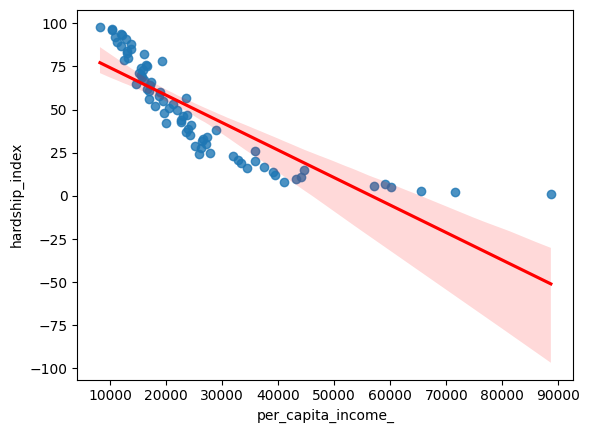

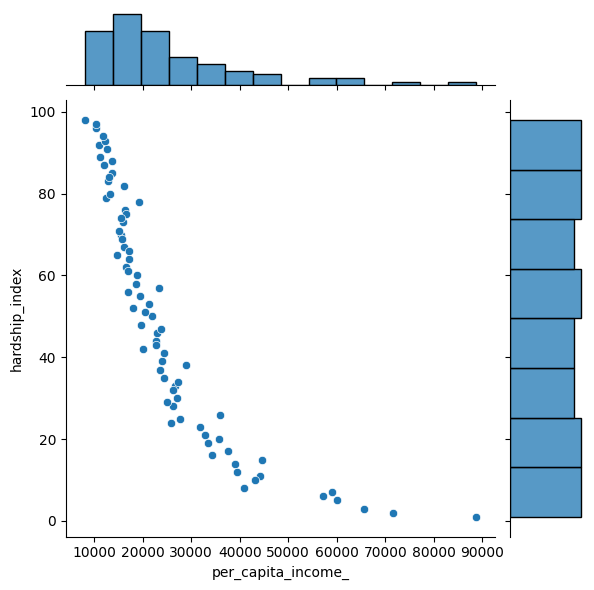

In [179]:
from scipy import stats

sns.regplot(x=df2['per_capita_income_'], y=df2['hardship_index'], line_kws={'color':'red'}, data=df2)
sns.jointplot(x=df2['per_capita_income_'], y=df2['hardship_index'], data=df2)

pearson_coef,p_value = stats.pearsonr(df2['per_capita_income_'], df2['hardship_index'])
print("Correlation Coefficient is:", pearson_coef, "P_Value is:", p_value)

In [182]:
df2['per_capita_income_'].isnull().value_counts()

df2[['hardship_index', 'per_capita_income_']].corr()

,hardship_index,per_capita_income_
hardship_index,1.000000,-0.849167
per_capita_income_,-0.849167,1.000000


In [185]:
df2.isnull().value_counts()

ca     community_area_name  percent_of_housing_crowded  percent_households_below_poverty  percent_aged_16_unemployed  percent_aged_25_without_high_school_diploma  percent_aged_under_18_or_over_64  per_capita_income_  hardship_index
False  False                False                       False                             False                       False                                        False                             False               False             77
Name: count, dtype: int64


##### We can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Next time! 


##### Author of Lab

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Rav Ahuja</a>

#### <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
